In [2]:
import matplotlib.pyplot as plt
import numpy as np

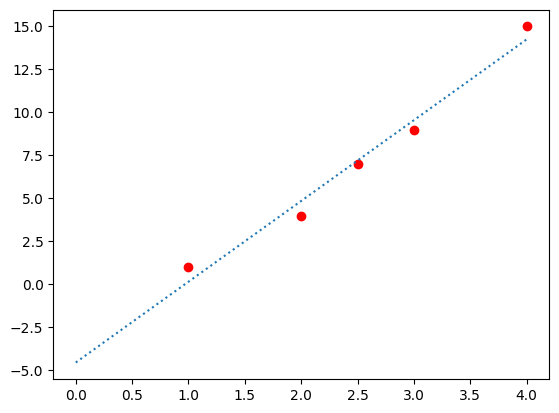

In [3]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
espX = sum(x)/len(x)
espY = sum(y)/len(y)
sumUp = 0
sumDown = 0
for i in range(len(x)):
    sumUp = sumUp + (x[i] - espX) * (y[i] - espY)
    sumDown += (x[i] - espX)**2
m = sumUp / sumDown
b = espY - (m * espX)
lastY = max(x) * m + b
x1 = np.array([0, max(x)])
y1 = np.array([b, lastY])
plt.plot(x, y, 'ro')
plt.plot(x1, y1, linestyle = 'dotted')
plt.show()


In [4]:
from mpl_toolkits import mplot3d

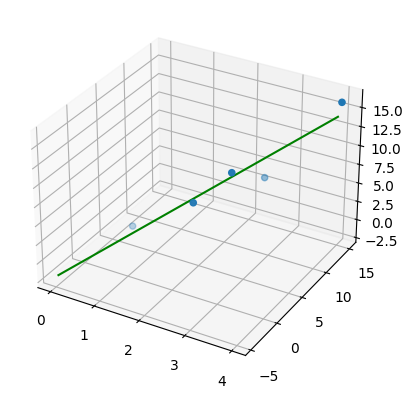

In [5]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]
k = [1, 2, 3, 4, 5]
espX = sum(x)/len(x)
espY = sum(y)/len(y)
espZ = sum(z)/len(z)
espK = sum(k)/len(k)
sumX = 0
sumXY = 0
sumXZ = 0
sumXK = 0
for i in range(len(x)):
    sumXY = sumXY + (x[i] - espX) * (y[i] - espY)
    sumXZ = sumXZ + (x[i] - espX) * (z[i] - espZ)
    sumXK = sumXK + (x[i] - espX) * (k[i] - espK)
    sumX += (x[i] - espX)**2
mXY = sumXY / sumX
mXZ = sumXZ / sumX
mXK = sumXK / sumX
b = espY - (mXY * espX)
c = espZ - (mXZ * espX)
d = espK - (mXK * espX)
lastY = max(x) * mXY + b
lastZ = max(x) * mXZ + c
lastK = max(x) * mXK + d

xCoords = [0, max(x)]
yCoords = [b, lastY]
zCoords = [c, lastZ]
kCoords = [c, lastK]


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, 'gray')
ax.plot3D(xCoords, yCoords, zCoords, 'green')

In [6]:
def lobf(coords):
    params = []
    espX = sum(coords[0])/len(coords[0])
    sumX = 0
    for i in range(len(coords[0])):
        sumX += (coords[0][i] - espX)**2
    for dim in coords[1:]:
        espDim = sum(dim)/len(dim)
        sumDim = 0
        for i in range(len(dim)):
            sumDim = sumDim + (coords[0][i] - espX) * (dim[i] - espDim)
        mDim = sumDim / sumX
        ogn = espDim - (mDim * espX)
        params.append([mDim, ogn])
    return params

[[4.7, -4.55], [4.1, -1.8499999999999996], [1.4, -0.5]]



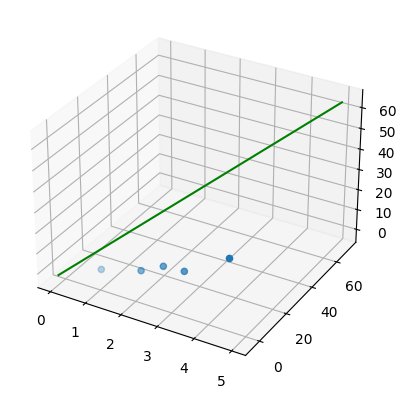

In [7]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]
k = [1, 2, 3, 4, 5]
eq = lobf([x,y,z,k])

lastY = (max(y)+1) * eq[0][0] + eq[0][1]
lastZ = (max(y)+1) * eq[1][0] + eq[1][1]
lastK = (max(y)+1) * eq[2][0] + eq[2][1]

xCoords = [0, max(x) + 1]
yCoords = [b, lastY]
zCoords = [c, lastZ]
kCoords = [c, lastK]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, 'gray')
ax.plot3D(xCoords, yCoords, zCoords, 'green')
print(eq)
print()

In [8]:
def lobfComp(n, coords):
    comp = []
    espN = sum(coords[n])/len(coords[n])
    sumN = 0
    for i in range(len(coords[n])):
        sumN += (coords[0][i] - espN)**2
    if (n == len(coords) - 1):
        compCopie = coords[:n]
    else:
        compCopie = coords[:n] + coords[n+1:]
    for dim in compCopie:
        espDim = sum(dim)/len(dim)
        sumDim = 0
        for i in range(len(dim)):
            sumDim = sumDim + (coords[n][i] - espN) * (dim[i] - espDim)
        mDim = sumDim / sumN
        ogn = espDim - (mDim * espN)
        comp.append([mDim, ogn])
    return comp

In [9]:
def computeValues(v, equations):
    res = []
    for eq in equations:
        res.append(v * eq[0] + eq[1])
    return res

In [10]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]

eq = lobfComp(0, [x,y,z])

print(eq)
computeValues(4, eq)

[[4.7, -4.55], [4.1, -1.8499999999999996]]


[14.25, 14.549999999999999]

In [11]:
def lobfComp(n, coords):
    comp = []
    espN = sum(coords[n])/len(coords[n])
    sumN = 0
    for i in range(len(coords[n])):
        sumN += (coords[0][i] - espN)**2
    if (n == len(coords) - 1):
        compCopie = coords[:n]
    else:
        compCopie = coords[:n] + coords[n+1:]
    for dim in compCopie:
        espDim = sum(dim)/len(dim)
        sumDim = 0
        for i in range(len(dim)):
            sumDim = sumDim + (coords[n][i] - espN) * (dim[i] - espDim)
        mDim = sumDim / sumN
        ogn = espDim - (mDim * espN)
        comp.append([mDim, ogn])
    return comp

In [12]:
def findValue(n, values, data):
    res = []
    espN = sum(data[n])/len(data[n])
    sumN = 0
    for i in range(len(data[n])):
        sumN += (data[0][i] - espN)**2
    for j in range (len(data)):
        if (j != n):
            espDim = sum(data[j])/len(data[j])
            sumDim = 0
            for i in range(len(data[j])):
                sumDim = sumDim + (data[j][i] - espDim) * (data[n][i] - espN)
            mDim = sumDim / sumN
            ogn = espN - (mDim * espDim)
            if (j == len(values)):
                index = j-1
            else:
                index = j
            res.append((values[index] * mDim + ogn))
    return res

In [13]:
import random

x = [k for k in range(1, 100)]
y = [k*1.1 for k in range(1, 100)]
z = [k*1.2 for k in range(1, 100)]

sumErreur = 0
for i in range(20):
    index = random.randrange(len(x))
    res = findValue(2, [x[index], y[index]], [x, y, z])
    erreur = abs(1-(((res[0] + res[1]) / 2) / z[index]))
    sumErreur += erreur
    print("Valeur trouvée : ", (res[0] + res[1]) / 2, "  Vraie valeur : ", z[index], "  Erreur : ", erreur)

print("\nErreur moyenne : ", sumErreur / 20)

Valeur trouvée :  215.4110078627591   Vraie valeur :  376   Erreur :  0.42709838334372574
Valeur trouvée :  182.83774124374554   Vraie valeur :  4   Erreur :  44.709435310936385
Valeur trouvée :  215.06075768406004   Vraie valeur :  372   Erreur :  0.42187968364499995
Valeur trouvée :  202.10150107219442   Vraie valeur :  224   Erreur :  0.09776115592770351
Valeur trouvée :  206.65475339528234   Vraie valeur :  276   Erreur :  0.2512508934953538
Valeur trouvée :  184.5889921372409   Vraie valeur :  24   Erreur :  6.69120800571837
Valeur trouvée :  195.79699785561115   Vraie valeur :  152   Erreur :  0.2881381437869155
Valeur trouvée :  199.29949964260186   Vraie valeur :  192   Erreur :  0.03801822730521809
Valeur trouvée :  200.35025017869907   Vraie valeur :  204   Erreur :  0.0178909304965732
Valeur trouvée :  204.903502501787   Vraie valeur :  256   Erreur :  0.19959569335239458
Valeur trouvée :  215.06075768406004   Vraie valeur :  372   Erreur :  0.42187968364499995
Valeur trouvé

In [25]:
def minusSquare(coords):
    mX = sum(coords[0]) / len(coords[0])
    mY = sum(coords[1]) / len(coords[1])
    xS = 0
    for i in coords[0]:
        xS += i**2
    xS /= len(coords[0])
    xy = 0
    for i in range(len(coords[0])):
        xy += coords[0][i] * coords[1][i]
    xy /= len(coords[0])
    a = (xy - mX * mY) / ((xS) - mX**2)
    b = mY - a * mX
    return a, b

In [26]:
x = [k for k in range(1, 100)]
y = [k*4 for k in range(1, 100)]

eq = lobfComp(1, [x,y])

res = minusSquare([x, y])
print(res, eq)
" lobfComp plus d'erreur que moindresCarres "
valX = 12
print(res[0] * valX + res[1], eq[0][0] * valX + eq[0][1])

NameError: name 'lobfComp' is not defined

In [27]:
x = [k for k in range(1, 100)]
y = [k*4 for k in range(1, 100)]
z = [k*10 for k in range(1, 100)]
res = minusSquare([x, y])
res2 = minusSquare([x, z])

lastY = max(x) * res[0] + res[1]
lastZ = max(x) * res2[0] + res2[1]

x1 = np.array([0, max(x)])
y1 = np.array([res[1], lastY])
z1 = np.array([res2[1], lastZ])

#plt.plot(x, y, 'ro')
plt.plot(x1, y1, linestyle = 'dotted')
plt.plot(x1, z1, linestyle = 'dashed')
plt.show()

NameError: name 'np' is not defined

In [64]:
def findValuesMinusSquares(values, n, coords):
    res = []
    for i in range(len(coords)):
        if (i != n):
            eq = minusSquare([coords[i], coords[n]])
            res.append(eq[0] * values[i] + eq[1])
    return res

In [78]:
"""x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
z = [3, 6, 9, 8, 16]

i = 2

res = findValuesMinusSquares([x[i], y[i], z[i]], 2, [x, y, z])
"""

import random

x = [k for k in range(1, 100)]
y = [k*1.1 for k in range(1, 100)]
z = [k*1.2 for k in range(1, 100)]

sumErreur = 0
for i in range(20):
    index = random.randrange(len(x))
    res = findValuesMinusSquares([x[index], y[index], z[index]], 2, [x, y, z])
    erreur = abs(1-(((res[0] + res[1]) / 2) / z[index]))
    sumErreur += erreur
    print("Valeur trouvée : ", (res[0] + res[1]) / 2, "  Vraie valeur : ", z[index], "  Erreur : ", erreur)

print("\nErreur moyenne : ", sumErreur / 20)

Valeur trouvée :  25.200000000000053   Vraie valeur :  25.2   Erreur :  2.220446049250313e-15
Valeur trouvée :  77.99999999999999   Vraie valeur :  78.0   Erreur :  2.220446049250313e-16
Valeur trouvée :  109.19999999999995   Vraie valeur :  109.2   Erreur :  5.551115123125783e-16
Valeur trouvée :  79.2   Vraie valeur :  79.2   Erreur :  0.0
Valeur trouvée :  61.20000000000001   Vraie valeur :  61.199999999999996   Erreur :  2.220446049250313e-16
Valeur trouvée :  80.39999999999999   Vraie valeur :  80.39999999999999   Erreur :  0.0
Valeur trouvée :  27.600000000000044   Vraie valeur :  27.599999999999998   Erreur :  1.7763568394002505e-15
Valeur trouvée :  42.00000000000003   Vraie valeur :  42.0   Erreur :  6.661338147750939e-16
Valeur trouvée :  18.000000000000057   Vraie valeur :  18.0   Erreur :  3.1086244689504383e-15
Valeur trouvée :  86.39999999999998   Vraie valeur :  86.39999999999999   Erreur :  1.1102230246251565e-16
Valeur trouvée :  83.99999999999999   Vraie valeur :  84.